<a href="https://colab.research.google.com/github/ukablahblah/MentalHealthAppReview/blob/main/mentalhealthapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper


In [ ]:
from google_play_scraper import reviews
import pandas as pd

apps = {
    "Calm": "com.calm.android",
    "BetterHelp": "com.betterhelp",
    "Youper": "br.com.youper",
    "Shine": "com.shinetext.shine",
    "Wysa": "bot.touchkin",
    "Happify": "com.happify.happifyinc",
    "MindDoc": "de.moodpath.android",
    "Insight Timer": "com.spotlightsix.zentimerlite2",
    "Aura": "com.aurahealth",
    "Simple Habit": "com.simplehabit.simplehabitapp"
}



all_reviews = []

for app_name, package in apps.items():
    print(f"Scraping {app_name}...")
    result, _ = reviews(
        package,
        lang='en',
        country='us',
        count=5000,
        filter_score_with=None
    )

    if not result:
        print(f"⚠️ No reviews found for {app_name}. Skipping.")
        continue

    # Check for required keys
    sample = result[0]
    expected_keys = ['userName', 'score', 'at', 'content']
    if not all(key in sample for key in expected_keys):
        print(f"⚠️ Unexpected format for {app_name}. Skipping.")
        continue

    df = pd.DataFrame(result)[['userName', 'score', 'at', 'content']]
    df.columns = ['user', 'rating', 'date', 'review']
    df['app'] = app_name
    all_reviews.append(df)

# Combine if there's any data
if all_reviews:
    df_all = pd.concat(all_reviews)
    df_all.to_csv("mental_health_reviews.csv", index=False)
    print("✅ Done. Saved as 'mental_health_reviews.csv'")
else:
    print("❌ No valid review data scraped.")


Scraping Calm...
Scraping BetterHelp...
Scraping Youper...
Scraping Shine...
Scraping Wysa...
Scraping Happify...
Scraping MindDoc...
Scraping Insight Timer...
Scraping Aura...
Scraping Simple Habit...
✅ Done. Saved as 'mental_health_reviews.csv'


In [ ]:
import pandas as pd

df = pd.read_csv("mental_health_reviews.csv")
df.head()
df['app'].value_counts()


,count
app,
Calm,5000
BetterHelp,5000
Youper,5000
Wysa,5000
MindDoc,5000
Insight Timer,5000
Simple Habit,5000
Shine,4456
Aura,4083


In [ ]:
!pip install nltk textblob

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import re

nltk.download('stopwords')
nltk.download('wordnet')

# Load data
df = pd.read_csv("mental_health_reviews.csv")

# Remove duplicates based on user + date + review text
df = df.drop_duplicates(subset=['user', 'date', 'review'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Setup for cleaning
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

# Clean reviews
df['clean_review'] = df['review'].apply(clean_text)

# Sentiment polarity (-1 to 1)
df['sentiment'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,user,rating,date,review,app,clean_review,sentiment
0,A Google user,5,2025-07-20 10:52:59,Established essential ✨️,Calm,established essential,0.000000
1,A Google user,2,2025-07-19 20:33:54,After using this app for about a little over a...,Calm,using app little year say im extremely disappo...,-0.145558
2,A Google user,5,2025-07-19 11:44:15,"help me stay calm, please",Calm,help stay calm please,0.300000
3,A Google user,5,2025-07-19 05:53:13,I fell asleep listening to Matthew McConaughey...,Calm,fell asleep listening matthew mcconaughey didn...,0.000000
4,A Google user,1,2025-07-19 03:11:45,i didn't find it helpful and I'm not fi ding i...,Calm,didnt find helpful im fi ding easy cancel subs...,0.433333


In [ ]:
!pip install matplotlib seaborn pandas nltk textblob

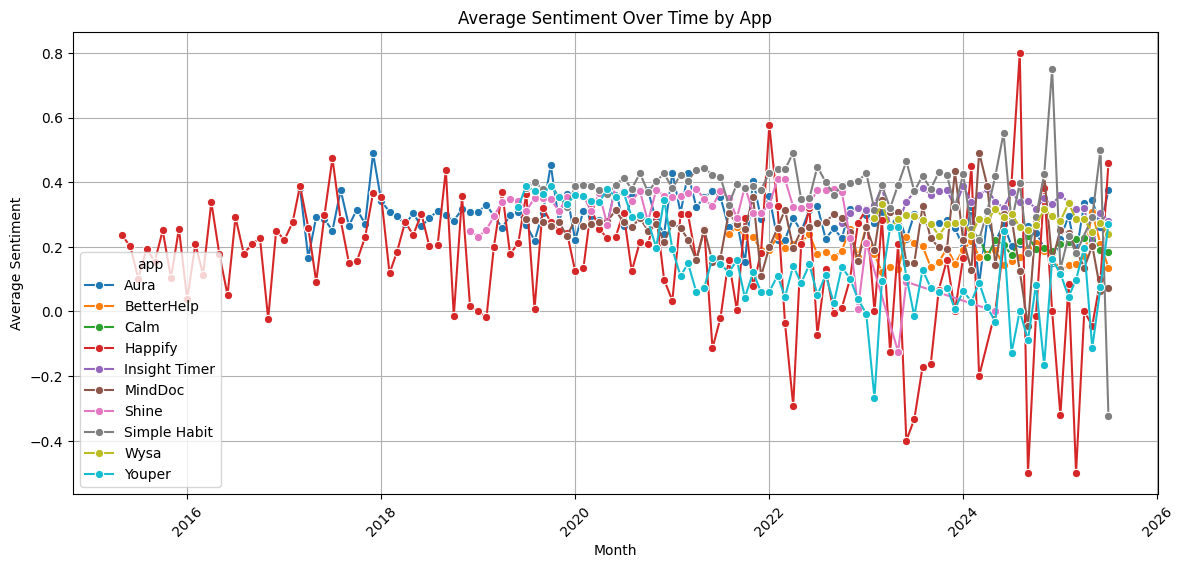

/tmp/ipython-input-8-1817949837.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=installs_df, x='app', y='installs', palette='gray')


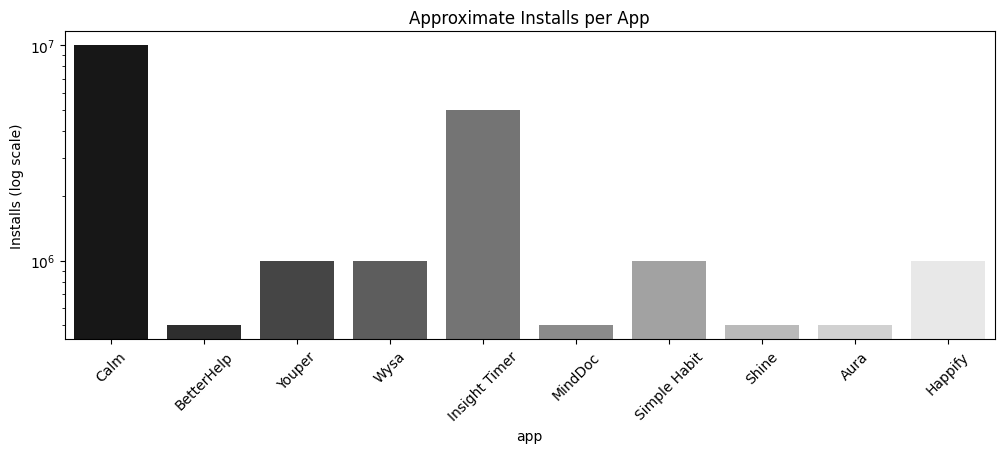

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare sentiment data
df['month'] = df['date'].dt.to_period('M')
sentiment_time = df.groupby(['app', 'month'])['sentiment'].mean().reset_index()
sentiment_time['month'] = sentiment_time['month'].dt.to_timestamp()

# Installs dict
installs = {
    "Calm": 10000000,
    "BetterHelp": 500000,
    "Youper": 1000000,
    "Wysa": 1000000,
    "Insight Timer": 5000000,
    "MindDoc": 500000,
    "Simple Habit": 1000000,
    "Shine": 500000,
    "Aura": 500000,
    "Happify": 1000000
}
installs_df = pd.DataFrame(list(installs.items()), columns=['app', 'installs'])

# Plot sentiment trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=sentiment_time, x='month', y='sentiment', hue='app', marker='o')
plt.title('Average Sentiment Over Time by App')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot installs bar chart separately
plt.figure(figsize=(12, 4))
sns.barplot(data=installs_df, x='app', y='installs', palette='gray')
plt.yscale('log')
plt.ylabel('Installs (log scale)')
plt.title('Approximate Installs per App')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install gensim nltk

In [ ]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Filter negative reviews
neg_reviews = df[df['sentiment'] < 0]['clean_review'].tolist()

# Tokenize
tokenized_reviews = [review.split() for review in neg_reviews]

# Remove stopwords again (optional safety)
stop_words = set(nltk.corpus.stopwords.words('english'))
tokenized_reviews = [[word for word in doc if word not in stop_words] for doc in tokenized_reviews]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]


In [ ]:
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=5,
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}:")
    print(topic)
    print()


Topic 1:
0.034*"app" + 0.029*"help" + 0.015*"helped" + 0.014*"feel" + 0.014*"helpful" + 0.014*"day" + 0.013*"mental" + 0.013*"im" + 0.012*"time" + 0.011*"health"

Topic 2:
0.040*"app" + 0.024*"meditation" + 0.015*"like" + 0.009*"im" + 0.009*"time" + 0.008*"used" + 0.008*"day" + 0.008*"ive" + 0.008*"help" + 0.007*"really"

Topic 3:
0.043*"app" + 0.011*"time" + 0.009*"get" + 0.009*"meditation" + 0.008*"even" + 0.008*"screen" + 0.008*"doesnt" + 0.008*"use" + 0.008*"work" + 0.007*"cant"

Topic 4:
0.042*"app" + 0.011*"calming" + 0.010*"subscription" + 0.009*"work" + 0.008*"asleep" + 0.008*"time" + 0.008*"sleep" + 0.008*"relaxing" + 0.007*"worst" + 0.006*"one"

Topic 5:
0.022*"app" + 0.021*"money" + 0.016*"pay" + 0.013*"dont" + 0.012*"therapist" + 0.012*"time" + 0.011*"free" + 0.011*"even" + 0.010*"waste" + 0.010*"want"



In [ ]:
extra_stopwords = {'app', 'im', 'ive', 'like', 'dont', 'time', 'even', 'really', 'one', 'get'}
stop_words = set(nltk.corpus.stopwords.words('english')).union(extra_stopwords)

tokenized_reviews = [
    [word for word in doc if word not in stop_words]
    for doc in tokenized_reviews
]


In [ ]:
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=8,
    id2word=dictionary,
    passes=15,
    random_state=42
)


In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
